In [12]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import sklearn
%matplotlib inline
# 한글출력 : 한글 출력 시 오류 나면 추가
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

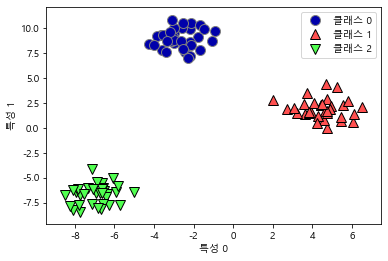

In [13]:
# 기계학습4-3 다중클래스
# make_blobs
# 특성 2, 클래스 3, 100개 샘플

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [14]:
# Multi-class
# multi_class = 'auto' [default]
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(multi_class='multinomial').fit(X, y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수 배열 : 
 [[-0.385  0.629]
 [ 0.741 -0.177]
 [-0.356 -0.452]]


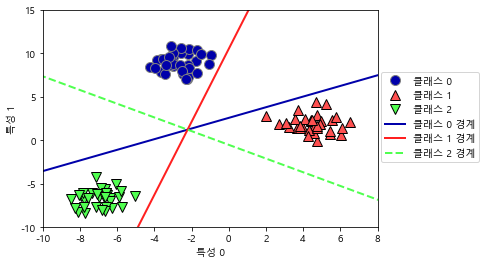

In [15]:
# multinomial
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'],loc=(1.01,0.3))

print("계수 배열 : \n", logr.coef_)


계수 배열 : 
 [[-0.683  1.062]
 [ 1.365 -0.327]
 [-0.612 -0.733]]


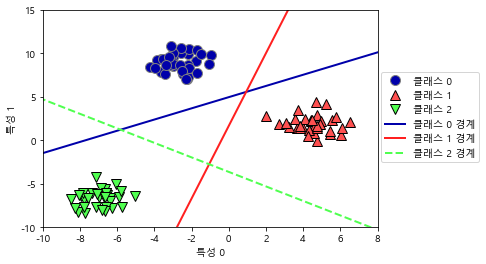

In [16]:
# ovr
logr_ovr = LogisticRegression(multi_class='ovr').fit(X, y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line_ovr = np.linspace(-15,15)
for coef, intercept, color in zip(logr_ovr.coef_, logr_ovr.intercept_, mglearn.cm3.colors):
    plt.plot(line_ovr, -(line_ovr * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'],loc=(1.01,0.3))

print("계수 배열 : \n", logr_ovr.coef_)

# LogisticRegression(multi_class = 'ovr').fit(X, y) 를 이용해서 ovr 모드로 바꿨는데
# 강의자료와 비슷하지만 다른 그림과 계수 배열이 나옵니다.
# 예시 자료보다 경계 삼각형이 더 큽니다.

Text(0, 0.5, '특성 1')

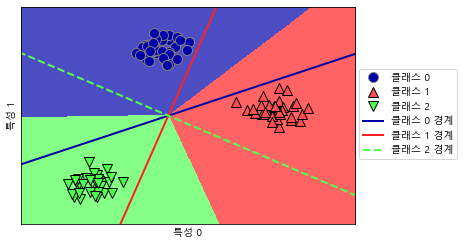

In [17]:
# 2차원 모든 데이터에 대한 예측 multinomial
mglearn.plots.plot_2d_classification(logr,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_,logr.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

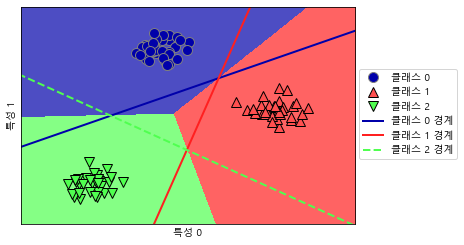

In [18]:
# 2차원 모든 데이터에 대한 예측 ovr
mglearn.plots.plot_2d_classification(logr_ovr,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line_ovr = np.linspace(-15,15)
for coef, intercept, color in zip(logr_ovr.coef_,logr_ovr.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line_ovr,-(line_ovr*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [19]:
# Iris Logistic regression test
# multinomial
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

iris_dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.40)
logr = LogisticRegression().fit(X,y)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도: {:.2f}".format(logr.score(X_test,y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test != y_pred).sum()))

print("predict:\n",logr.predict(X_test[:30]))
print("probabaility:\n",logr.predict_proba(X_test[:30]))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도: 0.92
Number of mislabeled points out of a total %d points : %d (60, 5)
predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
probabaility:
 [[0.    0.123 0.877]
 [0.015 0.968 0.017]
 [0.987 0.013 0.   ]
 [0.    0.041 0.959]
 [0.971 0.029 0.   ]
 [0.    0.012 0.988]
 [0.982 0.018 0.   ]
 [0.004 0.727 0.269]
 [0.002 0.761 0.236]
 [0.026 0.932 0.042]
 [0.    0.319 0.681]
 [0.01  0.784 0.206]
 [0.006 0.838 0.156]
 [0.004 0.79  0.205]
 [0.006 0.761 0.233]
 [0.983 0.017 0.   ]
 [0.009 0.796 0.195]
 [0.014 0.9   0.086]
 [0.965 0.035 0.   ]
 [0.985 0.015 0.   ]
 [0.002 0.339 0.659]
 [0.014 0.768 0.218]
 [0.945 0.055 0.   ]
 [0.972 0.028 0.   ]
 [0.002 0.536 0.462]
 [0.994 0.006 0.   ]
 [0.955 0.045 0.   ]
 [0.014 0.901 0.085]
 [0.139 0.858 0.004]
 [0.962 0.038 0.   ]]


In [20]:
# ovr
iris_dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.40)
logr_ovr = LogisticRegression(multi_class='ovr').fit(X,y)
logr_ovr.fit(X_train,y_train)
y_pred_ovr = logr_ovr.predict(X_test)

cm_ovr = confusion_matrix(y_test, y_pred_ovr)
print(cm_ovr)

print("\n테스트 세트의 정확도: {:.2f}".format(logr_ovr.score(X_test,y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test != y_pred_ovr).sum()))

print("predict:\n",logr_ovr.predict(X_test[:30]))
print("probabaility:\n",logr_ovr.predict_proba(X_test[:30]))

# 동영상 및 강의 자료에서는 multinomial과 ovr의 테스트 세트 정확도가 0.92로 같음
# 강의에 나온 ovr 행렬과 2, 3행 내용이 다름
# 이전 그래프부터 ovr 내용이 강의와 다르게 나오는 문제를 인지했으나
# 어느 부분이 틀린건지 알 수 없음

[[16  0  0]
 [ 0 20  3]
 [ 0  3 18]]

테스트 세트의 정확도: 0.90
Number of mislabeled points out of a total %d points : %d (60, 6)
predict:
 [2 1 0 2 0 2 0 2 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
probabaility:
 [[0.001 0.313 0.687]
 [0.029 0.937 0.034]
 [0.981 0.019 0.   ]
 [0.    0.333 0.667]
 [0.89  0.11  0.   ]
 [0.    0.187 0.813]
 [0.924 0.076 0.   ]
 [0.009 0.469 0.522]
 [0.005 0.587 0.409]
 [0.056 0.838 0.106]
 [0.    0.497 0.503]
 [0.021 0.511 0.468]
 [0.009 0.731 0.259]
 [0.008 0.625 0.367]
 [0.009 0.629 0.362]
 [0.919 0.081 0.   ]
 [0.014 0.654 0.331]
 [0.018 0.851 0.131]
 [0.81  0.19  0.   ]
 [0.972 0.028 0.   ]
 [0.002 0.425 0.573]
 [0.018 0.646 0.335]
 [0.852 0.148 0.   ]
 [0.752 0.248 0.   ]
 [0.003 0.468 0.529]
 [0.933 0.067 0.   ]
 [0.941 0.059 0.   ]
 [0.029 0.772 0.198]
 [0.17  0.823 0.006]
 [0.897 0.103 0.   ]]


In [21]:
# 기계학습5 나이브베이지안
# IRIS 분류
from sklearn.naive_bayes import GaussianNB # Gaussian naive Bayes classifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0)
# iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ",accuracy)
#print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test,y_test)))
#print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test != y_pred).sum()))

Accuracy:  1.0
Number of mislabeled points out of a total %d points : %d (38, 0)


In [22]:
# test_size = 0.40
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0, test_size=0.40)
# iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ",accuracy)
#print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test,y_test)))
#print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test != y_pred).sum()))

Accuracy:  0.9333333333333333
Number of mislabeled points out of a total %d points : %d (60, 4)


In [23]:
# test_size = 0.30
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0,test_size=0.30)
# iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ",accuracy)
#print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test,y_test)))
#print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test != y_pred).sum()))

Accuracy:  1.0
Number of mislabeled points out of a total %d points : %d (45, 0)


In [24]:
# test_size = 0.33
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0,test_size=0.33)
# iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ",accuracy)
#print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test,y_test)))
#print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test != y_pred).sum()))

# 테스트 사이즈가 변하면, 정확도도 함께 변화

Accuracy:  0.96
Number of mislabeled points out of a total %d points : %d (50, 2)


In [25]:
# Cancer data

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
classifierGN = GaussianNB().fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(classifierGN.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(classifierGN.score(X_test,y_test)))

훈련 세트 점수: 0.946
테스트 세트 점수: 0.937


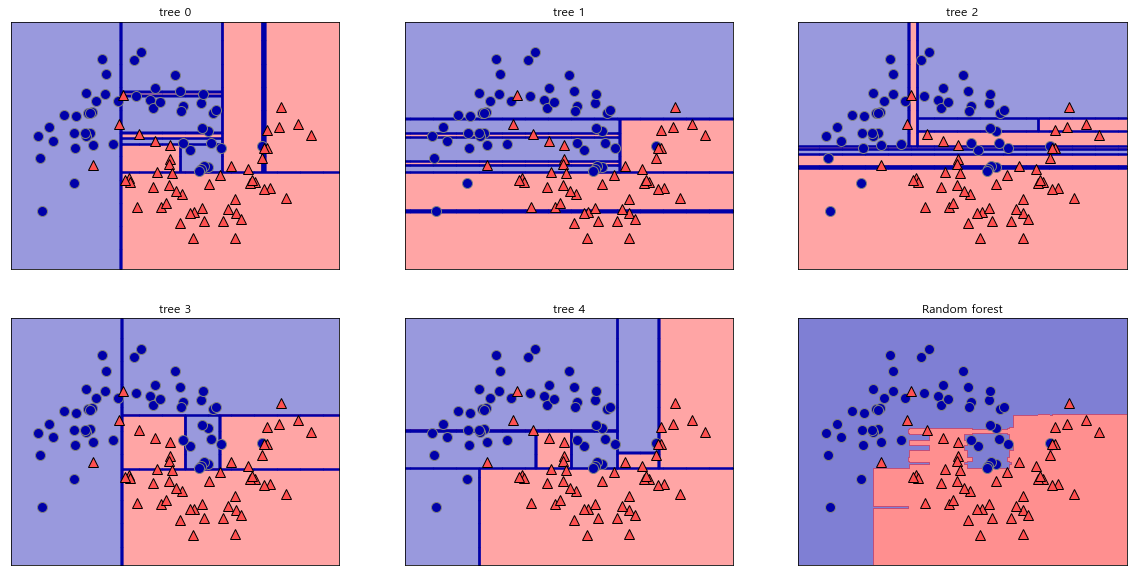

In [31]:
# 기계학습6 결정트리
# 2D Binary Classification Datasets
# 인터넷 참고
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

# 모델 학습
model = RandomForestClassifier(n_estimators=5, random_state=0)
model.fit(X_train, y_train)

# 결정 경계 시각화
# 다섯 개의 결정트리 결정 경계
fig, axes = plt.subplots(2, 3, figsize=(20,10) )
for i, (ax, tree) in enumerate( zip( axes.ravel(), model.estimators_ ) ):
    ax.set_title("tree {}".format(i) )
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# 랜덤포레스트로 만들어진 결정경계
axes[-1, -1].set_title("Random forest")
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.5, ax=axes[-1,-1] )
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [33]:
# 결정트리(make_moons)
# 기본 세팅
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
# tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.840


In [36]:
# 깊이 제한
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
# tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 0.933
테스트 세트 정확도: 0.800


In [38]:
# 결정트리(cancer data)
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
print("X_train.shape: {}".format(X_train.shape),"X_test.shape:{}".format(X_test.shape))
# tree = DecisionTreeClassifier(random_state=0)
for max_depth in [1,4,8]:
    tree = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    tree.fit(X_train,y_train)
    print("max_depth= {}".format(max_depth))
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
    print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

X_train.shape: (426, 30) X_test.shape:(143, 30)
max_depth= 1
훈련 세트 정확도: 0.923
테스트 세트 정확도: 0.923
max_depth= 4
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951
max_depth= 8
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [61]:
# graphviz 설치
!pip install graphviz

In [71]:
# graphviz 환경 변수 설정
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [72]:
# 결정 트리 출력
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

export_graphviz(tree,out_file="tree.dot",class_names=["악성","양성"],feature_names=cancer.feature_names,impurity=False,filled=True)

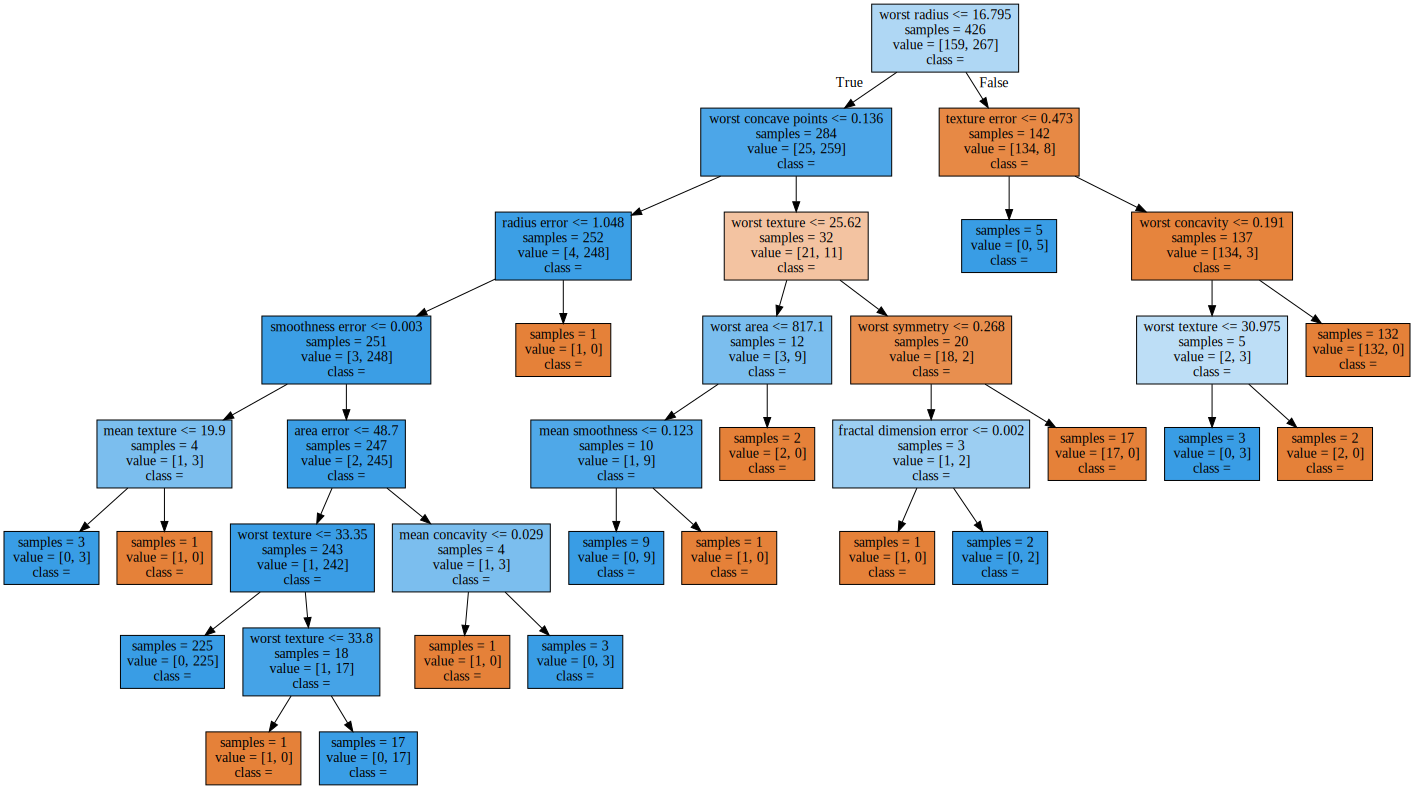

In [76]:
import graphviz

with open("tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [74]:
# 특성 중요도
print("특성 중요도:\n{}".format(tree.feature_importances_)) # 30개 특성

특성 중요도:
[0.    0.008 0.    0.    0.009 0.    0.008 0.    0.    0.    0.01  0.046
 0.    0.002 0.002 0.    0.    0.    0.    0.007 0.695 0.054 0.    0.014
 0.    0.    0.017 0.117 0.011 0.   ]


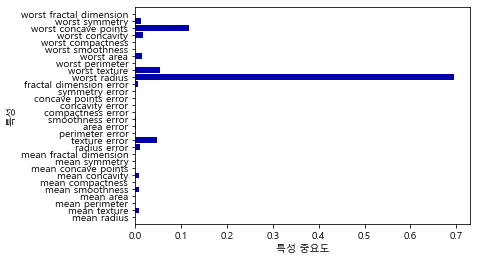

In [75]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_feature_importances_cancer(tree)

# 각 특성의 중요도 평가
# 0 - 1 사이 숫자
# 0 : 전혀 사용되지 않음
# 1 : 타깃 클래스를 완벽하게 예측
# 전체 합 : 1
# 중요도가 낮다고 해서 유용하지 않은 것은 아님(다른 특성이 동일한 정보를 지닐 수 있음)

Feature importances: [0. 1.]


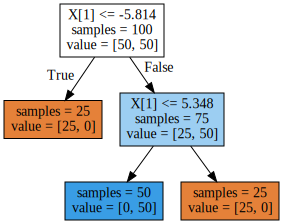

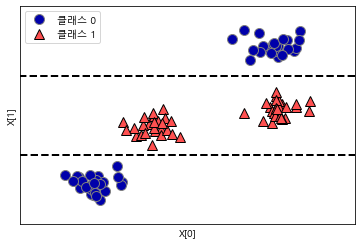

In [81]:
# 특성과 클래스 사이의 관계
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

ram_prices.shape: (333, 3)
ram_prices.keys: Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date     price
0           0  1957.0  4.11e+08
1           1  1959.0  6.79e+07
2           2  1960.0  5.24e+06
3           3  1965.0  2.64e+06
4           4  1970.0  7.34e+05


Text(0, 0.5, '가격 ($/Mbyte)')

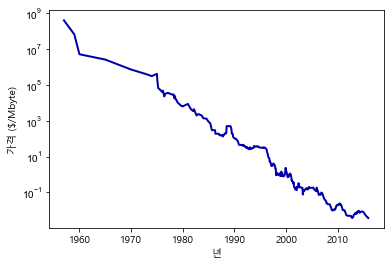

In [85]:
# 결정회귀트리(Decision tree regressor)
# 컴퓨터 메모리 가격 동향
# x축 : 연도
# y축 : 해당 연도의 ram 1메가바이트의 가격
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

print("ram_prices.shape: {}".format(ram_prices.shape))
print("ram_prices.keys: {}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [96]:
# 결정트리회귀 Vs. 선형 회귀
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print("data_train.shape: {}".format(data_train.shape),"data_test.shape:{}".format(data_test.shape))

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr= linear_reg.predict(X_all)

#  예측한 값의 로그 스케일을 되돌린다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.shape: (202, 3) data_test.shape:(131, 3)


<ipython-input-96-bb528bb673ca>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-96-bb528bb673ca>:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


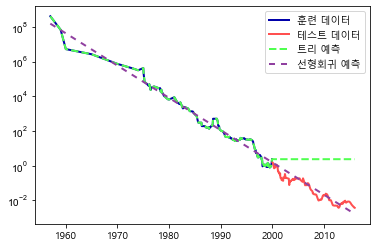

In [99]:
# 회귀 예측 비교
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date,data_train.price,label="훈련 데이터")
plt.semilogy(data_test.date,data_test.price,label="테스트 데이터")
plt.semilogy(ram_prices.date,price_tree,label="트리 예측")
plt.semilogy(ram_prices.date,price_lr,label="선형회귀 예측")
plt.legend()

# 결정트리회귀
# 훈련 데이터 범위 밖을 예측하는 외삽extrapolation이 불가능
# 시계열 데이터에 잘 맞지 않음
# 등락의 예측에는 적용 가능

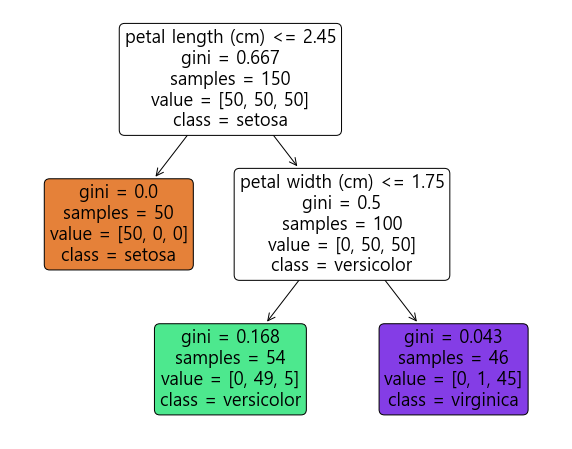

In [106]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 해당 import문 추가해야 Source 사용 가능 
from graphviz import Source 

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
export_graphviz(tree_clf,out_file="iris_tree.dot",feature_names=iris.feature_names[2:],class_names=iris.target_names,rounded=True,filled=True)
Source.from_file("iris_tree.dot")

from sklearn.tree import plot_tree
# plot_tree
#filled=True : 클래스별로 색깔구분
#rounded = true
#max_depth = 2, 출력의 단계를 결정할 수 있다.
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True, rounded = True, max_depth=2,feature_names=iris.feature_names[2:],class_names=iris.target_names)
plt.show()

In [107]:
# 기계학습7 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [111]:
# Random Forest
from sklearn.model_selection import cross_val_score # cross_val_score import

forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest,X,y,cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.920

테스트 세트 정확도 CV = 5: 0.860

테스트 세트 정확도 CV = 10: 0.840



In [113]:
# Decision Tres
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
dt = DecisionTreeClassifier(max_depth=None,min_samples_split=2,random_state=0)
dt.fit(X_train,y_train)
print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test,y_test)))

cvscores = cross_val_score(dt,X,y,cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(dt,X,y,cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.880

테스트 세트 정확도 CV = 5: 0.860

테스트 세트 정확도 CV = 10: 0.850



In [115]:
# Random Forest : cancer data
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))
print(cvscores)

# 선형모델이나 단일 결정트리보다 높은 성능
# 단일 결정트리처럼 max-features 매개변수 조정, 사전 가지치기 가능
# 기본 설정을 좋은 성능

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV = 10: 0.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


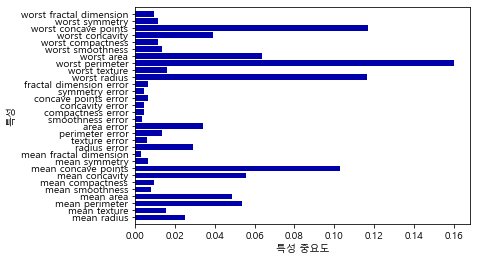

In [131]:
plot_feature_importances_cancer(forest)
# Decision tree와 같이 Worst-radius 특성을 중요하게 봄
# Worst perimeter(경계)를 가장 중요하게 선택
# 각 트리에서 특성의 중요도 취합
# 하나의 트리에서의 특성 중요도보다 신뢰가능
# 단일 결정 트리와 비교하여 많은 특성이 0 이상의 중요도